<a href="https://colab.research.google.com/github/gonzoreyes07/Simulaci-n-1/blob/main/Flecha_y_cojinete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**5.4** Una flecha será ensamblada en un cojinete como se muestra a continuación:

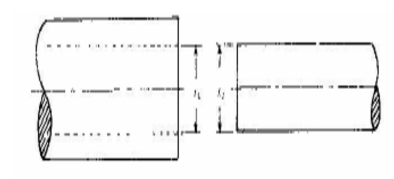

Si $x_1$ sigue una distribución normal con media 1.5 y varianza 0.0016, y $x_2$ sigue esta misma distribución de media 1.48 y varianza 0.0009, determine:

  a) La probabilidad de que haya interferencia.

  b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%.

Solución análitica:

$X_1∼N(\mu_1=1.5,σ_1^2=0.0016)$

$X_2∼N(\mu_2=1.48,σ_2^2=0.0009)$

Queremos encontrar la $P(X_2\geq X_1)$, ya que $X_1$ y $X_2$ son variables aleatorias distribuidas normalmente independientes, la diferencia $Y=X_1-X_2$, también esta distribuida normalmente.

Calculando la media y la varianza de $Y$:

Para la media: $\mu_Y=\mu_1-\mu_2=1.5-1.48=0.02$

Para la varianza: $\sigma_Y=\sqrt{σ_2^2+σ_1^2}=\sqrt{0.0009+0.0016}=\sqrt{0.0025}=0.05$

⇒ $Y=X_1-X_2∼N(\mu_Y=-0.02,\sigma_Y=0.05)$

Queremos la $P(X_1-X_2\leq0)=P(Y\leq0)$.  Ahora calculamos el estadístico $Z$:

$Z=\frac{Y-\mu_Y}{\sigma_Y}=\frac{Y-\mu_Y}{\sigma_Y}$

Para $Y=0$:

$Z=\frac{0-0.02}{0.05}=0.4$

$⇒P(Y\leq0)=P(Z\leq-0.4)$

Utilizando la CDF:

$P(Z\leq-0.4)=1-P(Z\leq0.4)$

Y por la tabla de la distribución normal:

$P(Z\leq0.4)≈0.6554$

$\Rightarrow P(Z\leq-0.4)=1-0.6554=0.3446$

**a) $P(X_2\geq X_1)=0.3446=34.46$%**



Para el siguiente inciso, sabemos que la probabilidad estimada de $\hat{p}$ sigue una distribución binomial, aproximada por una distribución normal para $n$ grande, i.e.:

$\hat{p}∼N(p,\sqrt{\frac{p(1-p)}{n}})$

Y sustituyendo el valor de p:

$Error estándar=\sqrt{\frac{(0.3446)(0.6554)}{n}}=\sqrt{\frac{0.225845}{n}}$

Si se requiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de confianza del 95% usamos $z_\frac{α}{2}=1.96$:

$E=1.96⋅\sqrt{\frac{0.225845}{n}}\leq0.01$

$⇒E=\sqrt{\frac{0.225845}{n}}\leq\frac{0.01}{1.96}$

$⇒E=\frac{0.225845}{n}\leq(\frac{0.01}{1.96})^2≈0.00002603$

$⇒E=n\geq\frac{0.225845}{0.00002603}≈8677.84$

**b) $n\geq8678$**

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def experimento(n=8678): # Usamos la n encontrada

  exitos = 0
  prob = 0

  x1 = np.random.normal(1.5,0.04,n)
  x2 = np.random.normal(1.48,0.03,n)

  exitos = np.sum(x2>=x1)

  prob = exitos/n

  return prob

In [14]:
def muestra (m=1000,n=8678):

# Siendo m el número de experimentos y n el número de veces que se repite cada experimento

  lista = [experimento(n) for _ in range(m)]

  return lista

x = muestra(m=1000,n=8678)


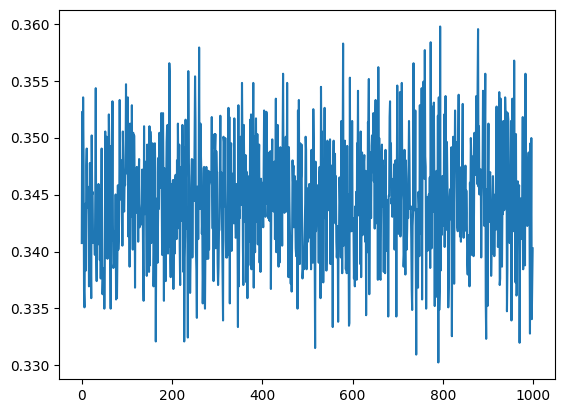

In [15]:
plt.plot(x) # Gráfica de convergencia

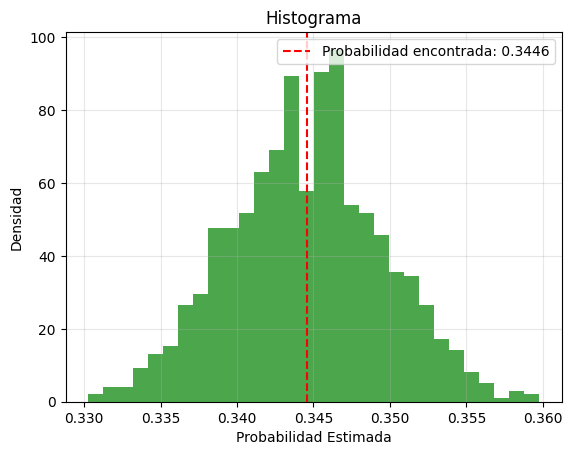

In [16]:
plt.hist(x,bins=30, density=True, alpha=0.7, color="green")
plt.axvline(0.3446, color='red', linestyle='--', label='Probabilidad encontrada: 0.3446')
plt.xlabel('Probabilidad Estimada')
plt.ylabel('Densidad')
plt.title('Histograma')
plt.legend()
plt.grid(True, alpha=0.3)